1. load coco api (pycocotools) and other library
2. load path file or load path string
3. load anntation path into COCO api
4. get all the ann id
5. load all the anntation by id

In [3]:
from pycocotools.coco import COCO
import json
from torch.utils.data import Dataset
import os
from PIL import Image

In [4]:
class COCO2017(Dataset):
    def __init__(self, PATH):
        super(COCO2017, self).__init__()
        with open(PATH, "r") as f:
            pth = json.load(f)
        self.api = pth["ROOT"] + pth["ANN"]
        self.api = COCO(self.api)
        self.img_path = pth["ROOT"] + pth["IMG"]
        self.ann_id = self.api.getAnnIds(catIds = 1)
    def __getitem__(self, index):
        anno = self.api.loadAnns(self.ann_id[index])[0]
        img = self.api.loadImgs(anno["image_id"])[0]
        img = self.img_path + img["file_name"]
        img = Image.open(img)
        return img, anno
    def __len__(self):
        return len(self.ann_id)

In [5]:
cocoval = COCO2017("PATH.json")

loading annotations into memory...
Done (t=0.30s)
creating index...
index created!


In [6]:
import matplotlib.pyplot as plt

In [7]:
imag = 0
for idx, (img, anno) in enumerate(cocoval):
    imag = img
    break

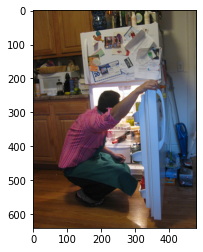

In [8]:
plt.imshow(imag)
plt.show()

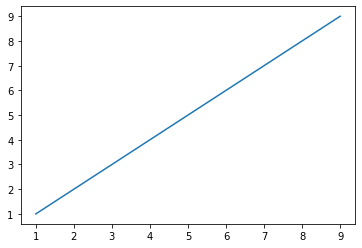

In [2]:
x = [1,2,3,4,5,6,7,8,9]
y = [1,2,3,4,5,6,7,8,9]
plt.plot(x,y)
plt.show()